In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from ringach import *

# download the pvc-1 data set from https://crcns.org

In [ ]:
# load entire preprocessed dataset into memory (downsampled and whitened)
# data_dir is the directory containing pvc-1
stim = RingachStimPreloaded(downsample=2, whitened=True, data_dir='.')
stim.load()

# e.g. extract frames 1,2,3 from movie 0, segment 1; and 4,5,6 from movie 0, segment 1
# frames = stim.get_frames([(0, 0, np.array([1,2,3])), (0, 1, np.array([4,5,6]))], offset=-1)

In [ ]:
# alternatively, load specific frames from disk and process as required
stim_alt = RingachStimPiecemeal(downsample=8, whitened=False, data_dir='.')

# e.g. extract a 10x10 section from frames 1,2,3 from movie 0, segment 1; and 4,5,6 from movie 0, segment 1
frames = stim_alt.get_pixels([(0, 0, np.array([1,2,3])), (0, 1, np.array([4,5,6]))], x_min=5, y_min=5, orig_size=10)

Loading from pvc-1/crcns-ringach-data/neurodata/ac1/ac1_u004_000.mat
Extracting spike data
........................................................................................................................done
Clustering spikes
........................................................................................................................done
Getting STAs............done


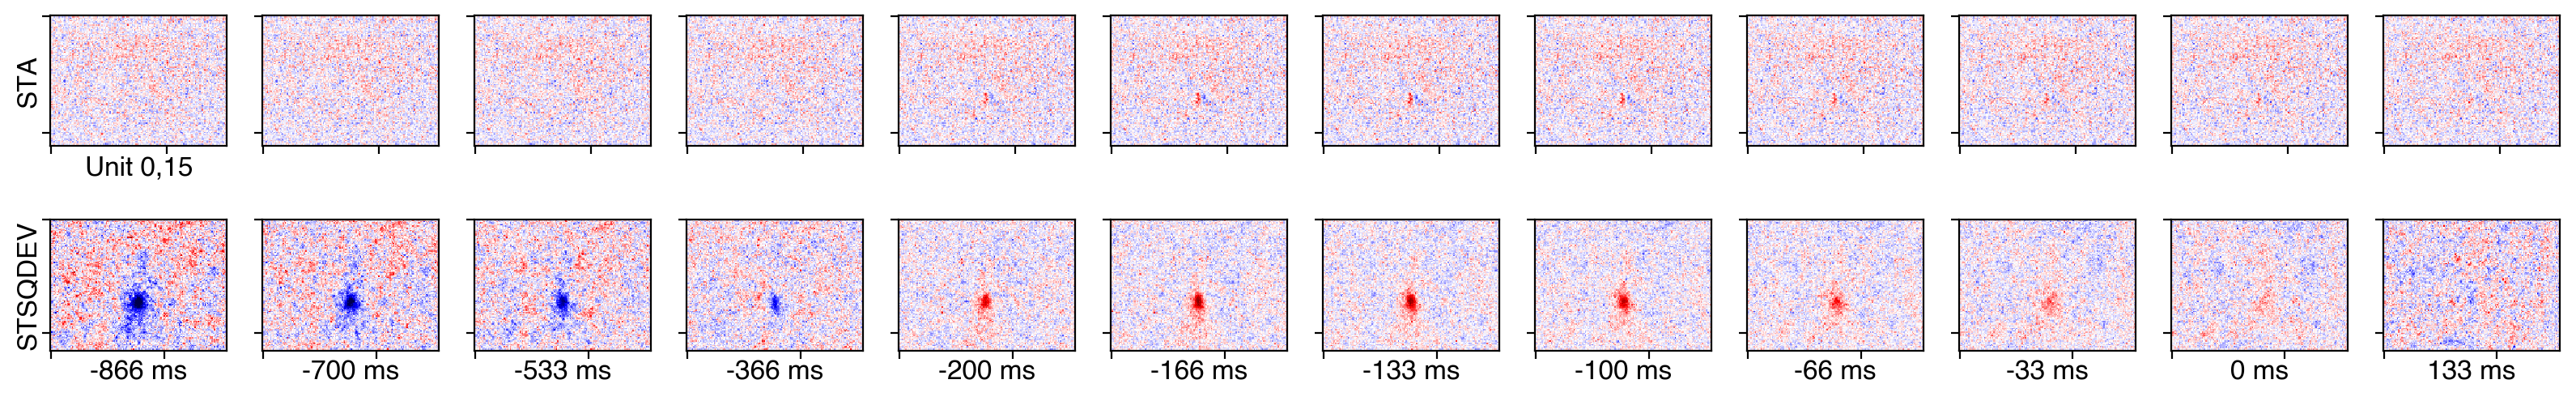

In [49]:
# load data for a single channel and calculate STA, STASQDEV
dataset_idx = 0
channel_idx = 15
data = RingachData(dataset_idx, channel_idx)
offsets = [-26, -21, -16, -11, -6, -5, -4, -3, -2, -1, 0, 4]

stas, sta_sqdevs = get_stas_sqdevs(data, stim, offsets)
plot_stas_sqdevs(dataset_idx, channel_idx, offsets, stas, sta_sqdevs)

In [ ]:
# generate figures of STA, STASQDEV for all units
figdir = Path(".", "figures", "sta_sqdev")
figdir.mkdir(parents=True, exist_ok=True)

offsets = [-26, -21, -16, -11, -6, -5, -4, -3, -2, -1, 0, 4]

dataset_idx = 0
channel_idx = 0

while True:
    try:
        print('Trying to get %d, %d' % (dataset_idx, channel_idx))
        data = RingachData(dataset_idx, channel_idx)
        print('Got data for %d, %d' % (dataset_idx, channel_idx))

        stas, sta_sqdevs = get_stas_sqdevs(data, stim, offsets)
        plot_stas_sqdevs(dataset_idx, channel_idx, offsets, stas, sta_sqdevs)
        plt.savefig(Path(figdir, 'sta_sqdevs-%02d-%02d.svg' % (dataset_idx, channel_idx)))        
        
        channel_idx = channel_idx + 1
    except IndexError:
        if channel_idx == 0:
            print('No more data files')
            break
        print('No more channels in this data file')
        dataset_idx = dataset_idx + 1
        channel_idx = 0
        continue
    except TypeError:
        print('Data file has wrong format (probably not natural movies)')
        dataset_idx = dataset_idx + 1
        channel_idx = 0
        continue

In [ ]:
# show the STAs / STASQDEVs
f = FigViewer(figdir)